In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('youtoxic_english_1000.csv')
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: xlabel='IsToxic', ylabel='count'>

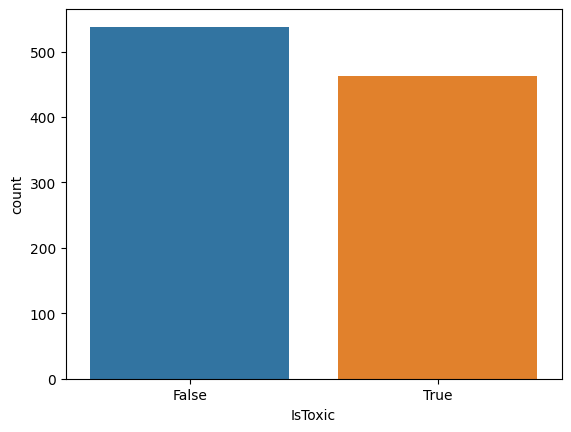

In [ ]:
sns.countplot(data=data,x="IsToxic")

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
import string
lemmatize=nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


True

In [ ]:
newData = data

In [ ]:
newData['Text'] = newData['Text'].replace(u'\xa0', u' ')

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Lemmatize the words
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Lemmatize the words
    nopunc = [lemmatize.lemmatize(word) for word in nopunc.split()]
    # Join the characters again to form the string.
    nopunc = ' '.join(nopunc)
    
    # Now just remove any stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
newData['Text'].head(5).apply(text_process)

0    [people, would, take, step, back, make, case, ...
1    [law, enforcement, trained, shoot, apprehend, ...
2    [dont, reckon, black, life, matter, banner, he...
3    [large, number, people, like, police, officer,...
4    [arab, dude, absolutely, right, shot, 6, extra...
Name: Text, dtype: object

In [ ]:
new_Data = []
df = pd.DataFrame(new_Data)

In [ ]:
df['CommentId'] = newData['CommentId']
df['VideoId'] = newData['VideoId']
df['Text'] = newData['Text']
df['IsToxic'] = newData['IsToxic']


In [ ]:
df.head()

,CommentId,VideoId,Text,IsToxic
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False


In [ ]:
df.head()


,CommentId,VideoId,Text,IsToxic
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

4386


In [ ]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 641)	2
  (0, 642)	1
  (0, 713)	1
  (0, 820)	1
  (0, 961)	2
  (0, 1001)	1
  (0, 1039)	1
  (0, 1430)	1
  (0, 1450)	1
  (0, 1674)	1
  (0, 1694)	1
  (0, 1781)	1
  (0, 1816)	1
  (0, 1829)	1
  (0, 2216)	1
  (0, 2277)	1
  (0, 2283)	2
  (0, 2290)	1
  (0, 2681)	1
  (0, 2707)	4
  (0, 2710)	1
  (0, 2830)	2
  (0, 2902)	6
  (0, 3027)	1
  (0, 3053)	2
  (0, 3081)	1
  (0, 3165)	1
  (0, 3246)	1
  (0, 3256)	1
  (0, 3443)	1
  (0, 3664)	1
  (0, 3711)	1
  (0, 3861)	1
  (0, 3936)	1
  (0, 4291)	2
(1, 4386)


In [ ]:
text_bow = bow_transformer.transform(df['Text'])

In [ ]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (1000, 4386)
Amount of Non-Zero occurences:  15856


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 4291)	0.2120470967470687
  (0, 3936)	0.08369391736037236
  (0, 3861)	0.1617147922778925
  (0, 3711)	0.12564438321929247
  (0, 3664)	0.11976432641897239
  (0, 3443)	0.13363811260110242
  (0, 3256)	0.11511075341292093
  (0, 3246)	0.15262758723850595
  (0, 3165)	0.10901622794005865
  (0, 3081)	0.10338381791641837
  (0, 3053)	0.23620686595889043
  (0, 3027)	0.1411790628409497
  (0, 2902)	0.41530956114947426
  (0, 2830)	0.12173186855109545
  (0, 2710)	0.14618011265623532
  (0, 2707)	0.32686048257534106
  (0, 2681)	0.12564438321929247
  (0, 2290)	0.13064543303457812
  (0, 2283)	0.14104111419376966
  (0, 2277)	0.08869496717565799
  (0, 2216)	0.14618011265623532
  (0, 1829)	0.1617147922778925
  (0, 1816)	0.12564438321929247
  (0, 1781)	0.11810343297944521
  (0, 1694)	0.0924389507876739
  (0, 1674)	0.11247102295580497
  (0, 1450)	0.11375204619529704
  (0, 1430)	0.09348154831840144
  (0, 1039)	0.1617147922778925
  (0, 1001)	0.15262758723850595
  (0, 961)	0.3052551744770119
  (0, 820)	0.161

In [ ]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(1000, 4386)


In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, toxic_train, toxic_test = \
train_test_split(df['Text'], df['IsToxic'], test_size=0.2)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

800 200 1000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clustering', KMeans(n_clusters=2)),  # cluster the data into  groups
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(text_train,toxic_train)


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002B0DDF8D3F0>)),
                ('tfidf', TfidfTransformer()),
                ('clustering', KMeans(n_clusters=2)),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(text_test)

In [ ]:
print(classification_report(predictions,toxic_test))

              precision    recall  f1-score   support

       False       1.00      0.56      0.72       200
        True       0.00      0.00      0.00         0

    accuracy                           0.56       200
   macro avg       0.50      0.28      0.36       200
weighted avg       1.00      0.56      0.72       200



C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('bow', TfidfVectorizer(analyzer=text_process)),  # strings to weighted TF-IDF scores
    ('clustering', KMeans(n_clusters=2)),  # cluster TF-IDF vectors using K-means
])

# Entraînement du pipeline
pipeline.fit(text_train,toxic_train)

# Prédiction sur les données de test
predictions = pipeline.predict(text_test)

# Évaluation du clustering
print(classification_report(predictions,toxic_test))

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.56      0.67       169
           1       0.15      0.42      0.22        31

    accuracy                           0.54       200
   macro avg       0.50      0.49      0.45       200
weighted avg       0.73      0.54      0.60       200

